# Generatives Trainig mit DeepHull loss, generatives und normales Netz trainieren gleichzeitig

In [1]:
import numpy as np
import torch

from script.Networks import ICNN
from script.Networks import SequentialNN
from torch.utils.data import DataLoader
from script.dataInit import ConvexDataset, Rhombus
from script.trainFunction import train_icnn_adversarial
from script.eval import Plots_for
from script.Verification import verification

In [2]:
icnn = ICNN([2, 10, 10, 1])
adversarial = SequentialNN([2, 10, 10, 2])
epochs = 10
batch_size = 10

number_of_adversarial_samples = 10000
number_of_train_samples = 10000
hyper_lambda = 1
x_range = [-1.5, 1.5]
y_range = [-1.5, 1.5]

In [3]:
included_space, ambient_space = Rhombus().get_uniform_samples(number_of_train_samples, x_range, y_range) #samples will be split in inside and outside the rhombus
true_extremal_points = Rhombus().get_extremal_points()
dataset = ConvexDataset(data=included_space)
train_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)
dataset = ConvexDataset(data= ambient_space)
ambient_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

In [4]:
random_samples = []
for i in range(number_of_adversarial_samples): # generate random samples
    x = np.random.default_rng().uniform(low=x_range[0], high=x_range[1])
    y = np.random.default_rng().uniform(low=y_range[0], high=y_range[1])
    random_samples.append([[x, y]])

value = torch.tensor(random_samples, requires_grad=True, dtype=torch.float32)
adversarial_set = ConvexDataset(data=value)
adversarial_loader = DataLoader(adversarial_set, batch_size=batch_size, shuffle=True)


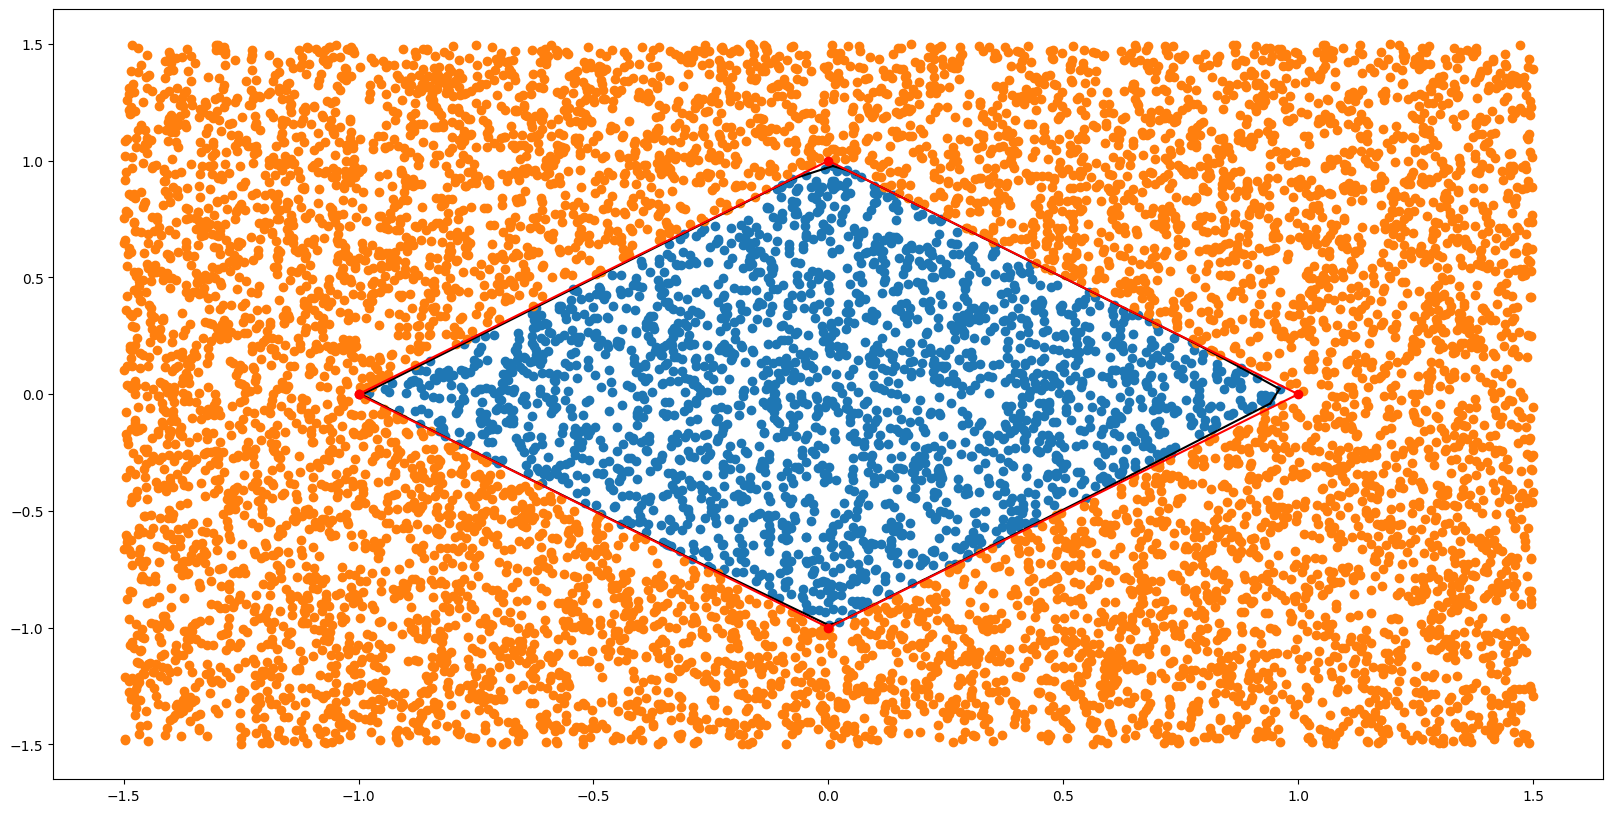

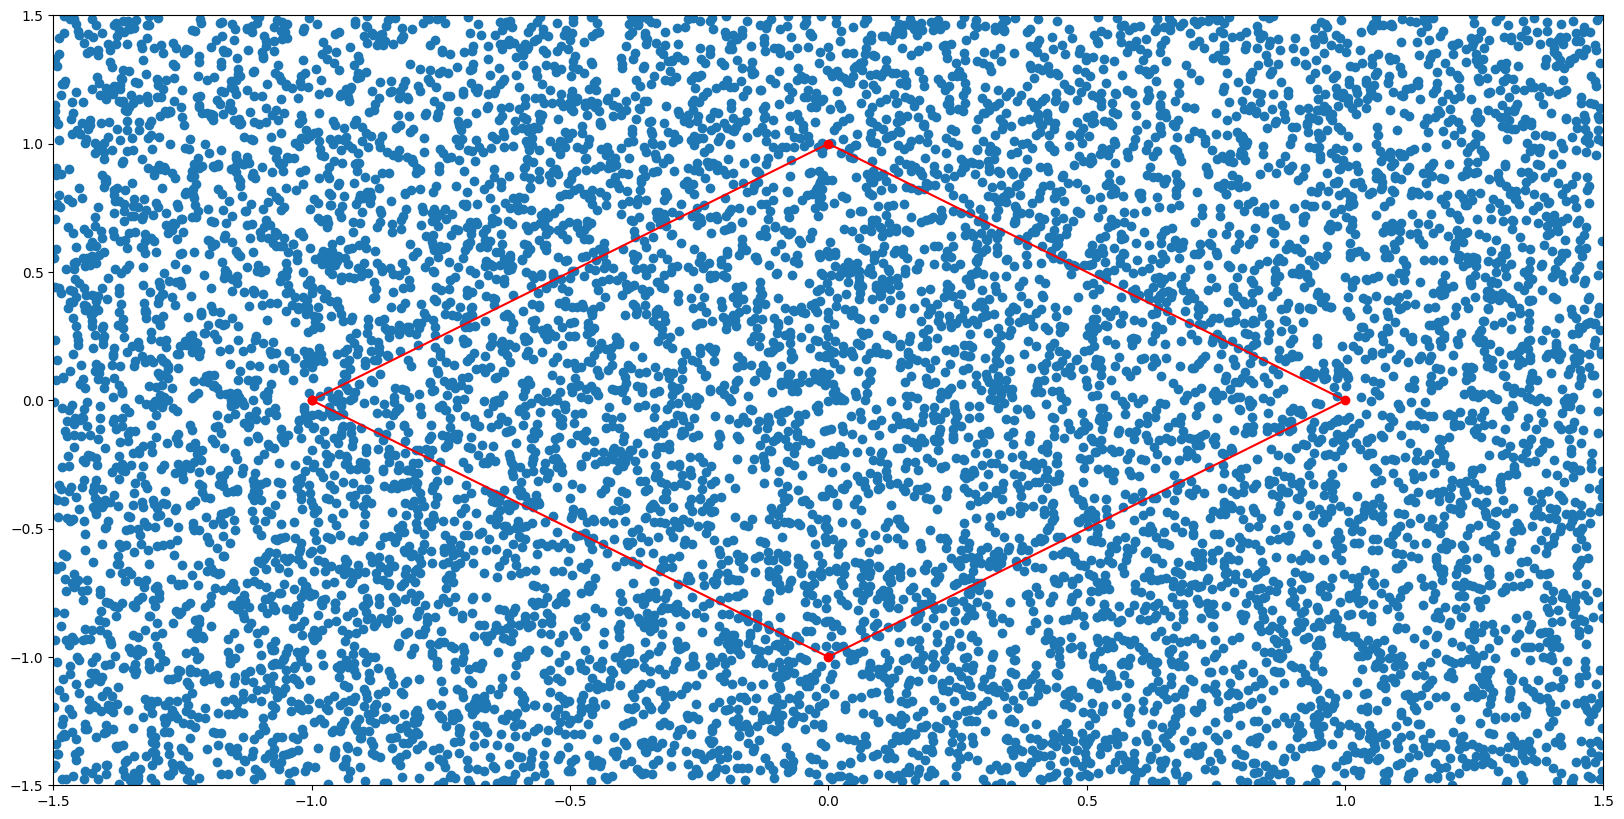

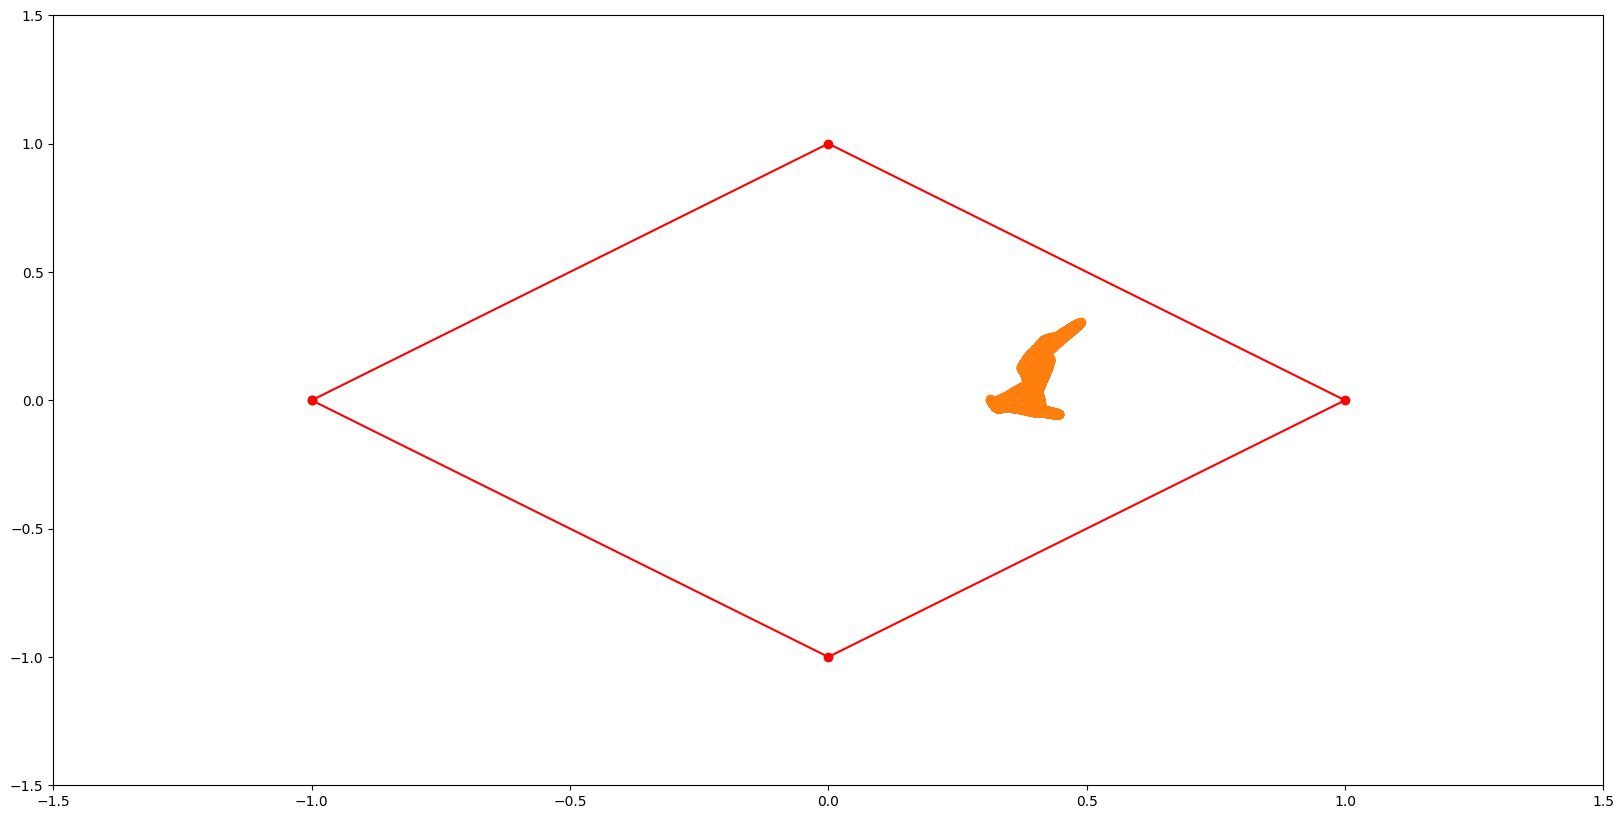

In [5]:
plots = Plots_for(0, icnn, included_space, ambient_space, true_extremal_points, x_range, y_range, adversarial=adversarial, adversarial_values=value)
plots.plt_initial()

plots.plt_adversarial_initial()
plots.plt_adversarial_dotted()


In [6]:
history = train_icnn_adversarial(icnn, adversarial, train_loader, adversarial_loader, epochs=epochs, hyper_lambda=hyper_lambda)


=== Epoch: 0===
batch = 0, mean loss = 1.8754717111587524, l_pos = 0.7351136803627014, l_neg = 0.5809454917907715, l_gen = 0.5594125986099243
batch = 100, mean loss = 1.784986973989128, l_pos = 0.7136054770781262, l_neg = 0.3966345438862791, l_gen = 0.6747469512542875
batch = 200, mean loss = 1.7189006835073974, l_pos = 0.675491012447509, l_neg = 0.2838646901854828, l_gen = 0.7595449804666623
batch = 216, mean loss = 1.7117812285820644, l_pos = 0.6710003843462026, l_neg = 0.27125400660076626, l_gen = 0.7695268373246547
=== Epoch: 1===
batch = 0, mean loss = 1.631699562072754, l_pos = 0.624288022518158, l_neg = 0.11919750273227692, l_gen = 0.8882139921188354
batch = 100, mean loss = 1.5736862491853167, l_pos = 0.5702228947441177, l_neg = 0.07973519487693759, l_gen = 0.9237281603388267
batch = 200, mean loss = 1.5512309614105604, l_pos = 0.5487592975002024, l_neg = 0.06565155507765007, l_gen = 0.9368201114645052
batch = 216, mean loss = 1.5475813779566023, l_pos = 0.5452106067979777, l_n

In [7]:
history = train_icnn_adversarial(icnn, adversarial, train_loader, adversarial_loader, epochs=epochs, hyper_lambda=hyper_lambda)


=== Epoch: 0===
batch = 0, mean loss = 1.1541990041732788, l_pos = 0.15418493747711182, l_neg = 0.004821584094315767, l_gen = 0.9951925277709961
batch = 100, mean loss = 1.1535077390104238, l_pos = 0.15350650250911713, l_neg = 0.0010757041578688244, l_gen = 0.9989255348054489
batch = 200, mean loss = 1.1469468696793514, l_pos = 0.14694614486018223, l_neg = 0.0007987120611574593, l_gen = 0.9992020127192065
batch = 216, mean loss = 1.1459488344413262, l_pos = 0.14594815429989938, l_neg = 0.0007664607814890418, l_gen = 0.9992342191161933
=== Epoch: 1===
batch = 0, mean loss = 1.1322516202926636, l_pos = 0.1322515308856964, l_neg = 0.0001964430121006444, l_gen = 0.9998036623001099
batch = 100, mean loss = 1.1271686660181177, l_pos = 0.1271686219785473, l_neg = 0.00024519322474895154, l_gen = 0.9997548555383587
batch = 200, mean loss = 1.121710919029084, l_pos = 0.12171089041292371, l_neg = 0.0002027858681504763, l_gen = 0.9997972460528511
batch = 216, mean loss = 1.120938300534531, l_pos =

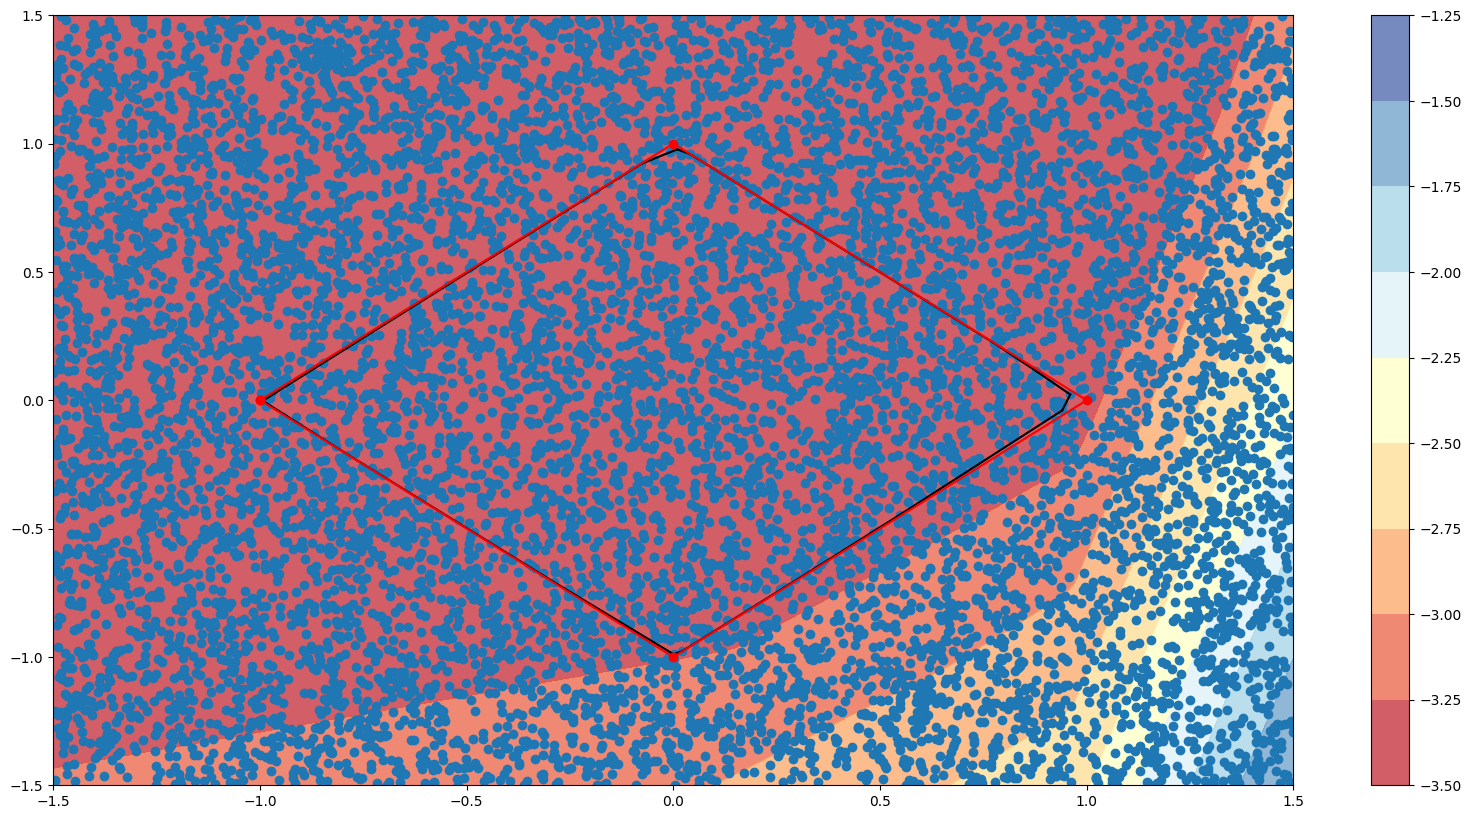

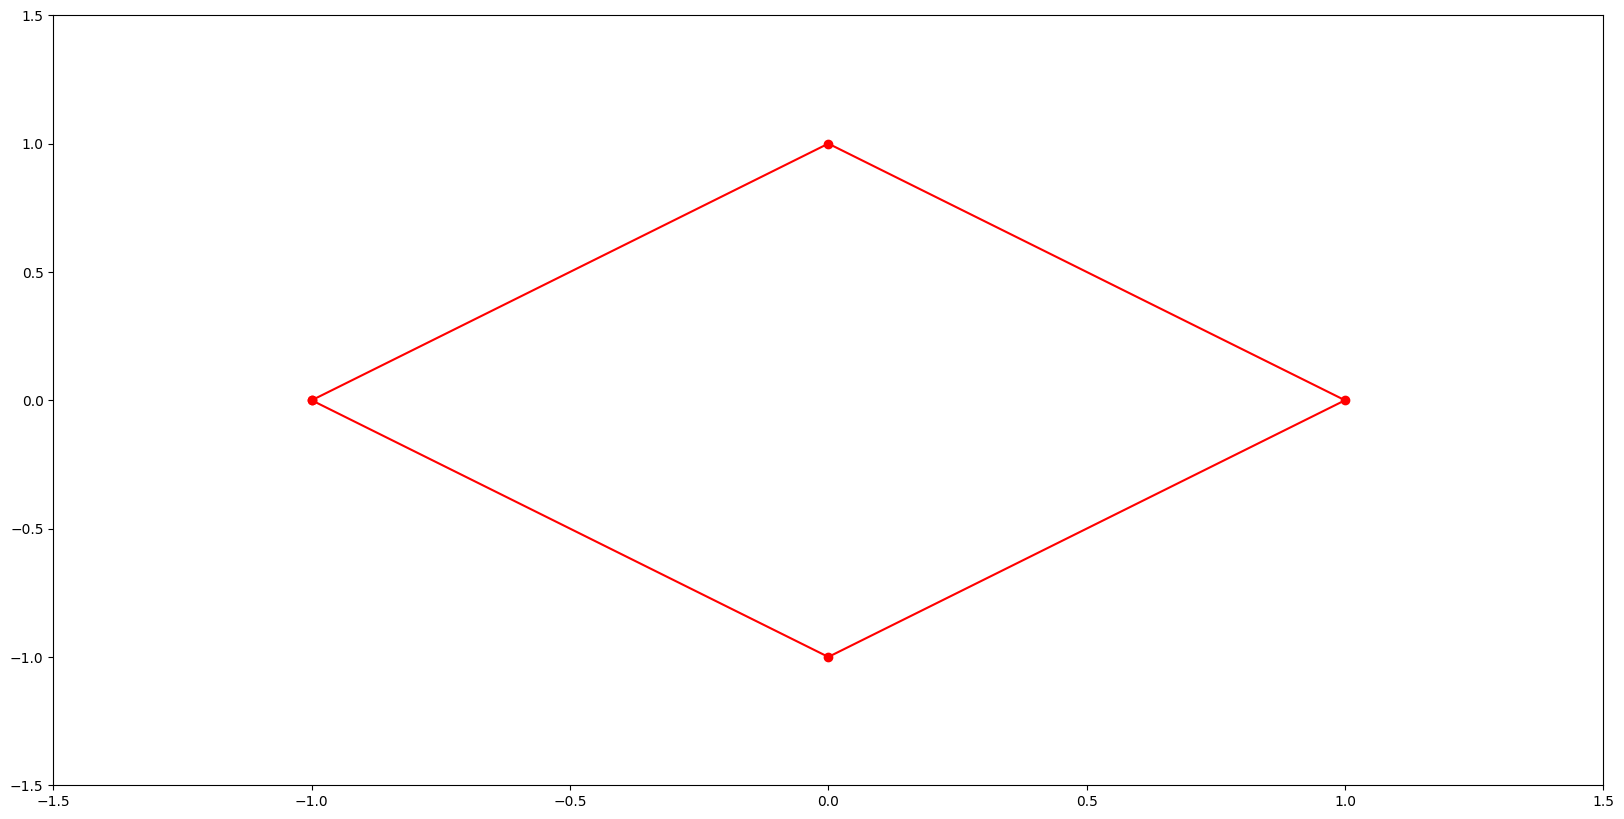

In [8]:
plots.plt_mesh()
plots.plt_adversarial_dotted()

In [9]:
result = verification(icnn, sequential=False)

Set parameter Username
Academic license - for non-commercial use only - expires 2023-11-12
Gurobi Optimizer version 10.0.0 build v10.0.0rc2 (win64)

CPU model: AMD Ryzen 7 5800H with Radeon Graphics, instruction set [SSE2|AVX|AVX2]
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads

Optimize a model with 138 rows, 96 columns and 376 nonzeros
Model fingerprint: 0x94265494
Variable types: 76 continuous, 20 integer (20 binary)
Coefficient statistics:
  Matrix range     [1e-05, 1e+01]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+01]
  RHS range        [2e-02, 1e+01]
Presolve removed 71 rows and 48 columns
Presolve time: 0.00s
Presolved: 67 rows, 48 columns, 272 nonzeros
Variable types: 32 continuous, 16 integer (16 binary)
Found heuristic solution: objective -3.2677396

Root relaxation: objective -3.204011e+00, 33 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl | 

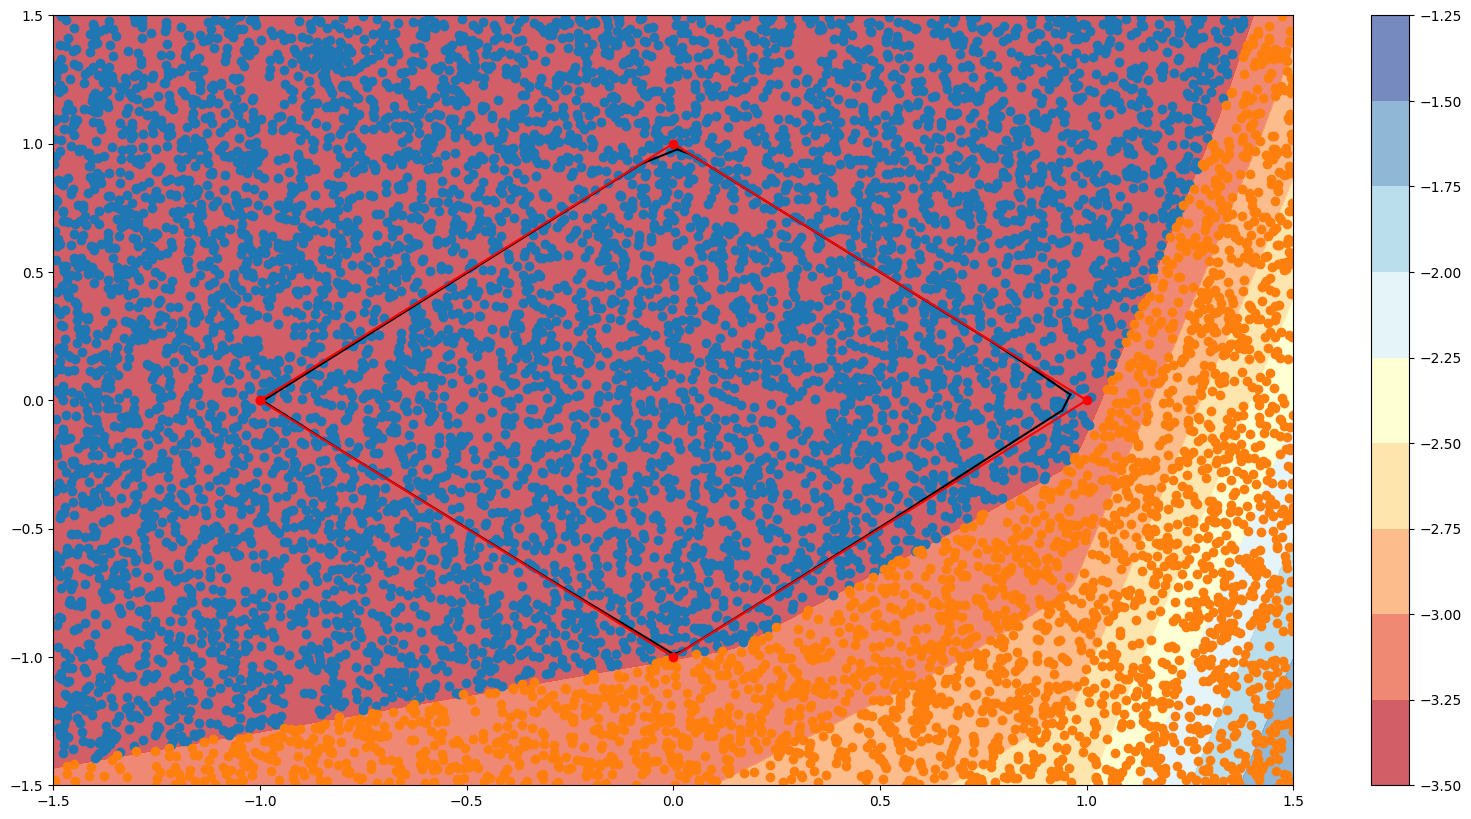

In [10]:
plots.c = result
plots.plt_mesh()